In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D

In [51]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train =x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


In [52]:
x_train[0].shape

(28, 28, 1)

In [53]:
type(x_train[0][1,1,0])

numpy.float64

In [54]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [55]:
class ModelMnist(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return x


model = ModelMnist()



In [56]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [57]:
train_loss = tf.keras.metrics.Mean()
test_loss = tf.keras.metrics.Mean()

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()


In [58]:
@tf.function
def train(images, labels):
    with tf.GradientTape() as tape:
      pred_labels = model(images)
      loss = loss_function(labels, pred_labels)
    gradinets = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradinets, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, pred_labels)


In [59]:
@tf.function
def test(images, labels):
    pred_labels = model(images)
    loss = loss_function(labels, pred_labels)
    test_loss(loss)
    test_accuracy(labels, pred_labels)



In [65]:
epochs = 7

for epoch in range(epochs):
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  # train
  for images, labels in train_dataset:
    train(images, labels)


  # test
  for images, labels in test_dataset:
    test(images, labels)

    print("epoch:",epoch + 1,
          f"Train Loss:, {train_loss.result()}",
          f"Train Acc:, {train_accuracy.result()}",
          f"Test Loss:, {test_loss.result()}",
          f"Test Acc:, {test_accuracy.result()}")

epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 3.175828169332817e-05 Test Acc:, 1.0
epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 1.6283329387078993e-05 Test Acc:, 1.0
epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 1.085803614842007e-05 Test Acc:, 1.0
epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 0.009589306078851223 Test Acc:, 0.9921875
epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 0.007671457715332508 Test Acc:, 0.9937499761581421
epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 0.006392881274223328 Test Acc:, 0.9947916865348816
epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 0.00549953430891037 Test Acc:, 0.9955357313156128
epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 0.055864784866571426 Test Acc:, 0.9921875
epoch: 1 Train Loss:, 5.563099633731916e-11 Train Acc:, 1.0 Test Loss:, 0.04

result:  0


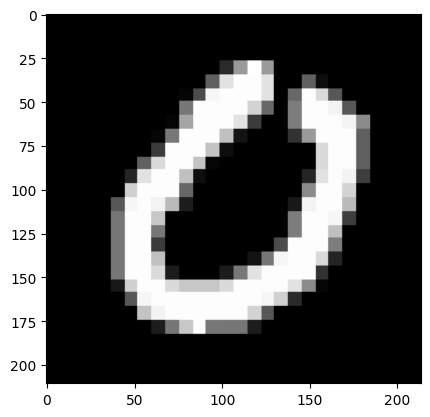

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/images0.png")
plt.imshow(image)
image = cv2.cvtColor(image,  cv2.COLOR_BGR2GRAY)
# Height, width
image = cv2.resize(image, (28,28))
# add batch size
image = image[tf.newaxis, ...]
# add channel
image = image[..., tf.newaxis]
image = image.astype("float32")
# image.shape


pred = model(image)
result = np.argmax(pred)
print("result: ", result )